MEDICAL INSURANCE COST PREDICION 

About the Dataset-

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
#importing the dataset into a dataframe
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [7]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
encoder = LabelEncoder()

In [9]:
labels = encoder.fit_transform(data.sex)

In [10]:
data['sex'] = labels

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


SEX

- MALE -> 1
- FEMALE -> 0

In [12]:
labels = encoder.fit_transform(data.region)

In [13]:
data['region'] = labels

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520


REGION

- Northeast -> 0
- Northwest -> 1
- Southeast -> 2
- Southwest -> 3

In [15]:
labels = encoder.fit_transform(data.smoker)

In [16]:
data['smoker'] = labels

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


SMOKER 

- Yes -> 1
- No -> 0

In [18]:
#splitting the parameters and target variable
X = data.drop(columns='charges',axis=1)
Y = data['charges']

In [19]:
#train test split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [21]:
model = RandomForestRegressor()

In [22]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:
testing_data_prediction = model.predict(X_test)

In [24]:
score = metrics.r2_score(Y_test,testing_data_prediction)

In [25]:
score

0.8429838247689903

In [26]:
#BULDING THE PREDICTION SYSTEM
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))



Predicted Medical Insurance Cost :  [17239.3561123]


c:\Users\swaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


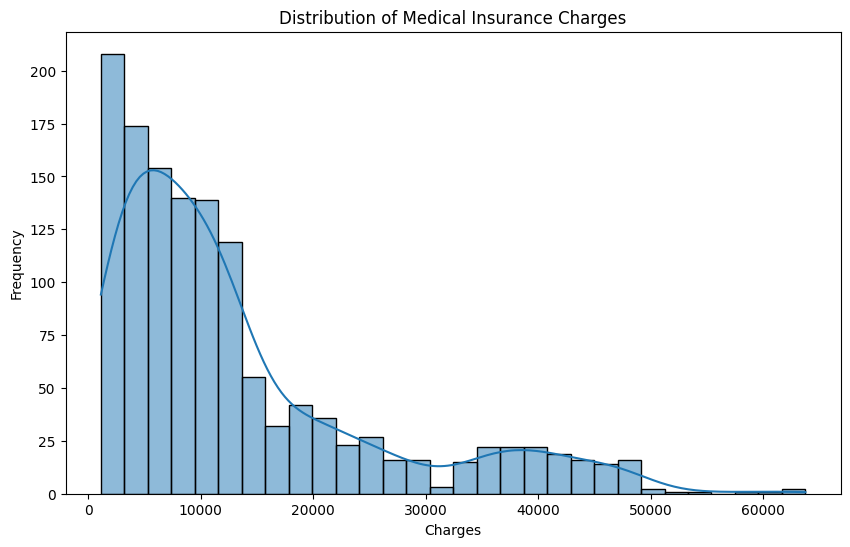

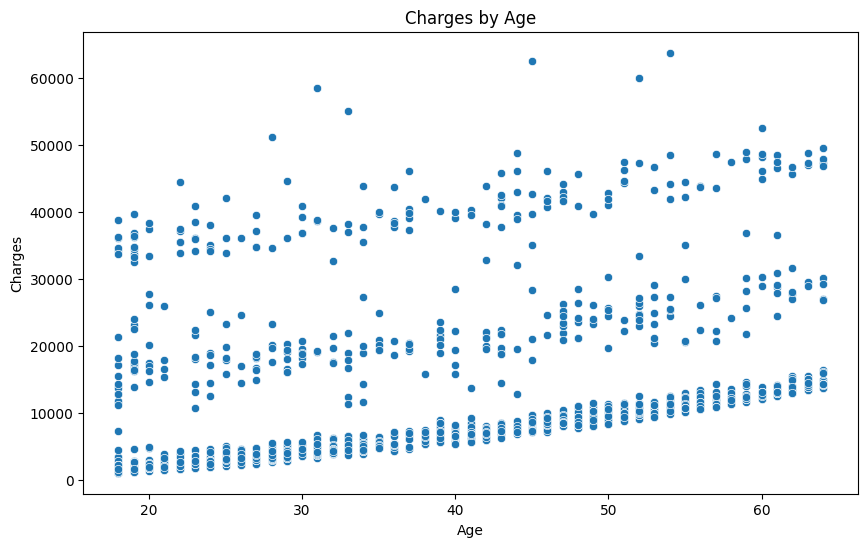

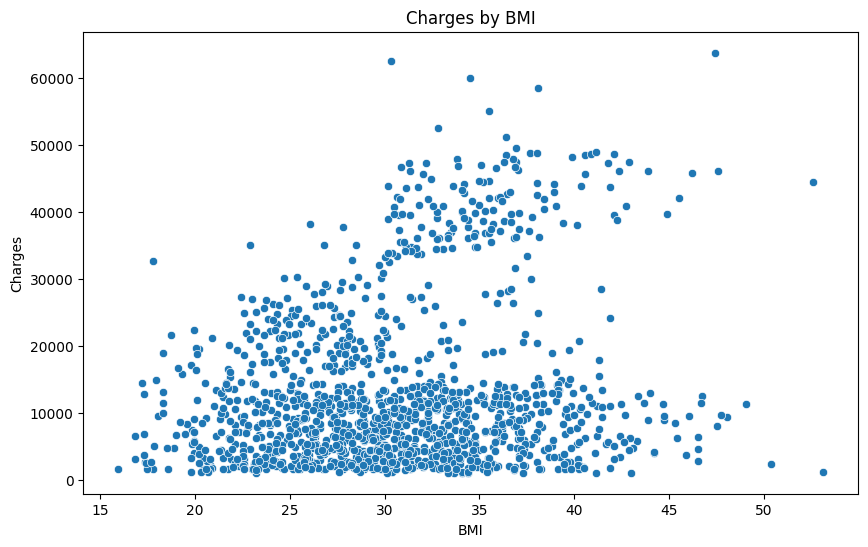

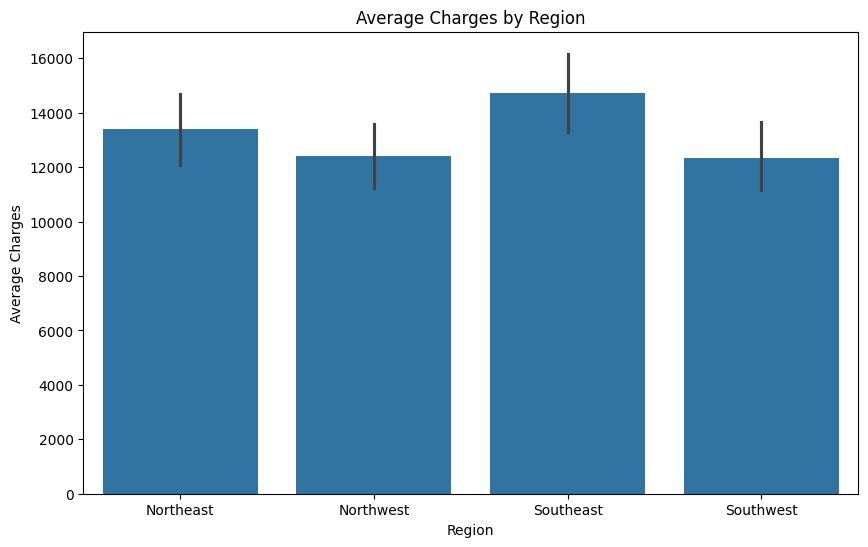

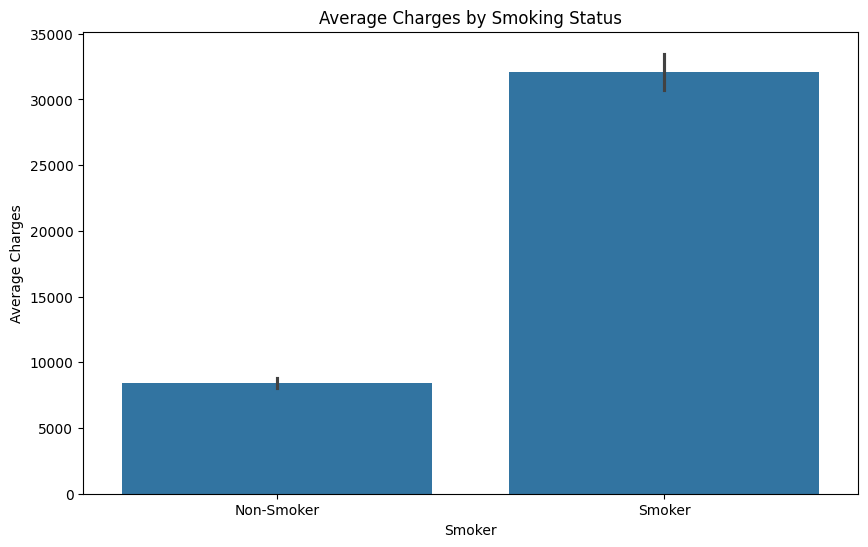

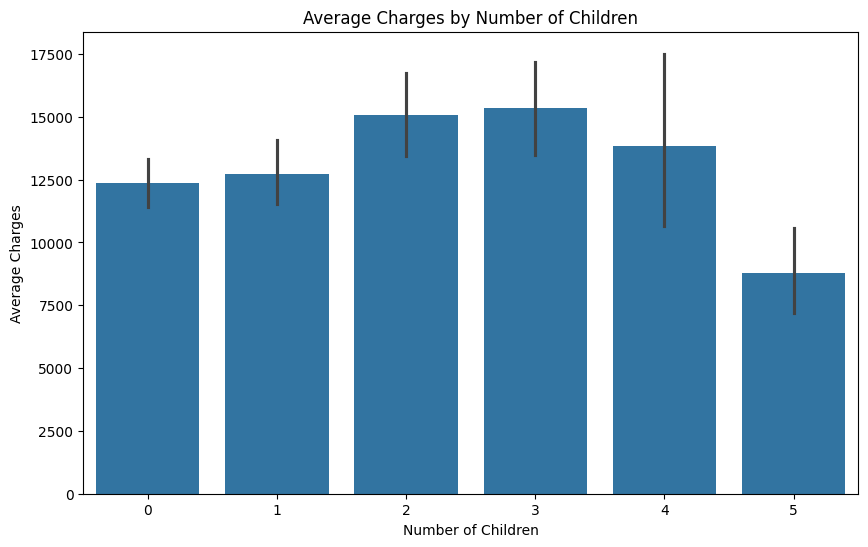

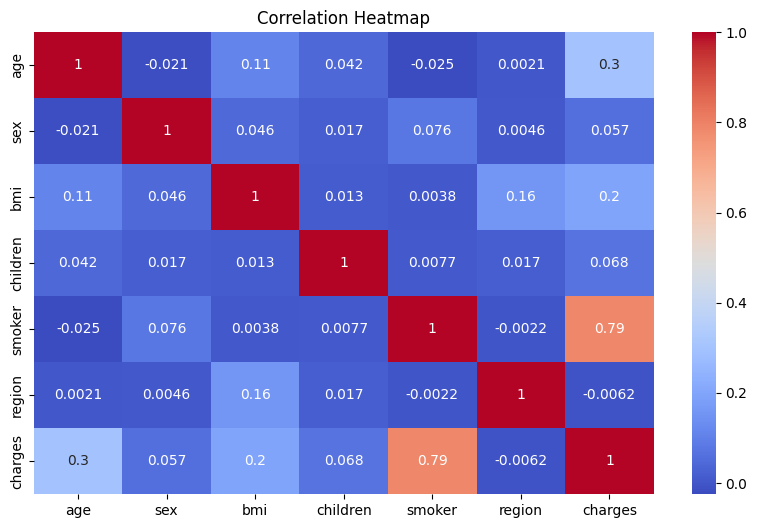

In [35]:
# Distribution of Charges
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Charges by Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Charges by BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Charges by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=data, estimator=np.mean)
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Northeast', 'Northwest', 'Southeast', 'Southwest'])
plt.show()

# Charges by Smoking Status
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=data, estimator=np.mean)
plt.title('Average Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()

# Charges by Number of Children
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=data, estimator=np.mean)
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Saving the trained model

In [27]:
import pickle

filename = 'medical_insurance_cost_predictor.sav'
pickle.dump(model, open(filename,'wb')) 